# Chapter 8 - Exercise 3: Wine _ Classifiers comparision

### Cho dữ liệu wine nằm trong tập tin wine.data.txt
(Xem chi tiết tại: http://archive.ics.uci.edu/ml/datasets/Wine)
### Yêu cầu: đọc dữ liệu về, chuẩn hóa dữ liệu (nếu cần) và áp dụng thuật toán SVM để thực hiện việc dự đoán loại rượu dựa trên thông tin được cung cấp
1. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được với tỷ lệ dữ liệu test là 0.3
2. Áp dụng thuật toán SVM
3. Tìm kết quả
4. Kiểm tra độ chính xác
5. Với X_new = [[13.71,5.65,2.45,20.5,95,1.68,.61,.52,1.06,7.7,.64,1.74,740], 
         [12.29,1.61,2.21,20.4,103,1.1,1.02,.37,1.46,3.05,.906,1.82,870],
        [13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050]], thì y_new có kết quả ?
6. So sánh hiệu suất của 4 thuật toán: RandomForestClassifier, SVC, GaussianNB, LogisticRegression
7. Trực quan hóa kết quả

In [4]:
# from google.colab import drive
# drive.mount("/content/gdrive", force_remount=True)

In [6]:
# %cd '/content/gdrive/My Drive/LDS6_MachineLearning/practice/Chapter8_SVM/'

In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [9]:
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

In [12]:
data = pd.read_csv('Data/wine.data.txt', sep=',', header= None) 
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [14]:
# data.head()

In [24]:
x = data.iloc[:, 1:14]
y = data.iloc[:, 0]

In [28]:
x.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [30]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3) 

In [34]:
svmC = svm.SVC(kernel='linear')  
svmC.fit(x_train, y_train)  

SVC(kernel='linear')

In [38]:
y_pred = svmC.predict(x_test)

In [40]:
y_pred

array([1, 2, 3, 3, 2, 2, 1, 2, 2, 3, 1, 2, 2, 2, 2, 3, 1, 1, 2, 3, 2, 2,
       1, 3, 2, 3, 2, 1, 3, 1, 2, 1, 3, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2,
       1, 2, 3, 3, 2, 2, 2, 1, 2, 3], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score 
print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"%") 

Accuracy is  96.29629629629629 %


In [44]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[18  1  0]
 [ 0 22  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.96      0.96      0.96        23
           3       0.92      1.00      0.96        12

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54



In [50]:
# Score of Training and Testing data
print("Training R^2 Score", svmC.score(x_train, y_train))
print("Testing R^2 Score", svmC.score(x_test, y_test))

Training R^2 Score 0.9919354838709677
Testing R^2 Score 0.9629629629629629


#### Summary about the model:
- High accuracy: ~0.94
- High precision: ~0.94, High recall: ~0.95
- High training R^2 score and High testing score, nearly the same
- => The good model

In [54]:
x_new = [[13.71,5.65,2.45,20.5,95,1.68,.61,.52,1.06,7.7,.64,1.74,740], 
         [12.29,1.61,2.21,20.4,103,1.1,1.02,.37,1.46,3.05,.906,1.82,870],
        [13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050]]
y_new = svmC.predict(x_new)
y_new

array([3, 2, 1], dtype=int64)

# <span style='color:yellow'> Compare classifiers: Logistic Regression, Gaussion Naive Bayes, SVM, KNN

In [71]:
###### Tính độ chính xác theo: Logistic, Naive Bayes, SVM, KNN
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split  

from sklearn.model_selection import cross_val_score
import datetime

models = [
    LogisticRegression(solver='liblinear'),
    GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    SVC(kernel='rbf', C = 100)
]
CV = 10
entries = []
for model in models:
    scores_train = []
    scores_test = []
    abs_scores=[]
    time_scores=[]
    for j in range(CV):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = j)
        
        t1=datetime.datetime.now()
        model.fit(x_train,y_train)
        t2=datetime.datetime.now()
      
        model_name = model.__class__.__name__
        s_train = model.score(x_train,y_train)
        s_test =  model.score(x_test,y_test)
        scores_train.append(s_train)
        scores_test.append(s_test)          
        abs_scores.append(abs(s_train-s_test))
        time_scores.append(round((t2-t1).microseconds/1000,1)) 
    
    entries.append([model_name, np.array(scores_train).mean(),np.array(scores_test).mean(),np.array(abs_scores).mean(),np.array(time_scores).mean()])

cv_df = pd.DataFrame(entries, columns=['model_name', 'score_train_mean','score_test_mean','abs_mean','time_mean'])

In [73]:
cv_df

,model_name,score_train_mean,score_test_mean,abs_mean,time_mean
0,LogisticRegression,0.985484,0.942593,0.045639,3.01
1,GaussianNB,0.987903,0.972222,0.023268,1.70
2,KNeighborsClassifier,0.786290,0.687037,0.099253,1.00
3,DecisionTreeClassifier,1.000000,0.924074,0.075926,1.57
4,RandomForestClassifier,1.000000,0.985185,0.014815,240.67
5,SVC,0.762097,0.766667,0.022551,0.62


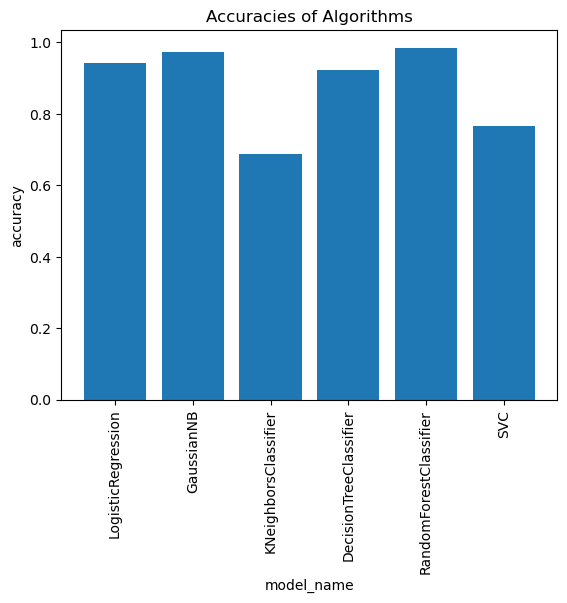

In [75]:
plt.bar(cv_df['model_name'],cv_df['score_test_mean'])
plt.xlabel('model_name')
plt.ylabel('accuracy')
plt.xticks(rotation='vertical')
plt.title("Accuracies of Algorithms")
plt.show()